# サンプルデータ内容確認

サンプルデータの内容を確認します。

## 出典

ここでは気象庁から提供されている気象データを利用します。
[気象庁「過去の気象データ・ダウンロード」](http://www.data.jma.go.jp/gmd/risk/obsdl/)

公開されているデータのうち、**2015年の東京のデータ(1年分)**を本Notebookで利用するCSV形式に変換し、サンプルデータとして利用します([tokyo2015.csv](sample_data/tokyo2015.csv))。変換は https://github.com/NII-cloud-operation/Literate-computing-Elasticsearch にて実施したものを利用しています。

サンプルデータと気象庁データの項目は、次のように対応しています。

| サンプルデータの項目 | 気象庁データの項目 | 備考 |
|-----------|--------------------|------|
| @timestamp | 年月日 ||
| location | 地点 | 気象庁データに直接の記載はないため、変換時に追加した |
| atmospheric_pressure | 日平均現地気圧 ||
| sea_level_pressure | 日平均海面気圧 ||
| precipitation_day | 降水量の日合計 ||
| precipitation_max_hour | 1時間降水量の日最大 ||
| precipitation_max_10min | 10分間降水量の日最大 ||
| temperature_avg | 日平均気温 ||
| temperature_max | 日最高気温 ||
| temperature_min | 日最低気温 ||
| humidity_avg | 日平均相対湿度 ||
| humidity_min | 日最小相対湿度 ||
| wind_speed_avg | 日平均風速 ||
| wind_speed_max | 日最大風速 ||
| wind_direction | 日最大風速（風向） ||
| wind_speed_max_moment | 日最大瞬間風速 ||
| wind_direction_max_moment | 日最大瞬間風速（風向） ||
| sunshine_duration | 日照時間 ||
| snowfall | 降雪量の日合計 ||
| snowfall_max | 日最深積雪 ||
| information_daytime | 天気概況（昼：06時～18時） ||
| information_night | 天気概況（夜：18時～翌日06時） |||

気象庁データの利用あたっては気象庁が公開している[利用規約](http://www.jma.go.jp/jma/kishou/info/coment.html)を参照してください。

# データの確認

データファイルは `tokyo2015.csv` に保持しています。

In [1]:
!ls -la *.csv

-rw-r--r-- 1 bit_kun users 43207 Oct  3 18:17 tokyo2015.csv


CSVファイルですので、pandasを使って簡単に読み込むことができます。

In [2]:
import pandas as pd
import os
from datetime import timedelta

dataframes = []
for filename in [n for n in os.listdir('.') if n.endswith('.csv')]:
    df = pd.read_csv(filename)
    df['@timestamp'] = pd.to_datetime(df['@timestamp'])
    for col in sorted(set(df.columns) - {'@timestamp', 'location', 'information_daytime', 'information_night', 'wind_direction_max_moment', 'wind_direction'}):
        df[col] = pd.to_numeric(df[col], errors='coerce')
    # オフセットを1/1に合わせる
    df['days'] = (df['@timestamp'] - df['@timestamp'].values[0]) / timedelta(days=1)
    df['weeks'] = (df['@timestamp'] - df['@timestamp'].values[0]) / timedelta(weeks=1)
    dataframes.append((filename, df))
print('{}個のCSVファイルを読み込みました。'.format(len(dataframes)))

1個のCSVファイルを読み込みました。


## 温度変化の確認

In [3]:
%matplotlib inline

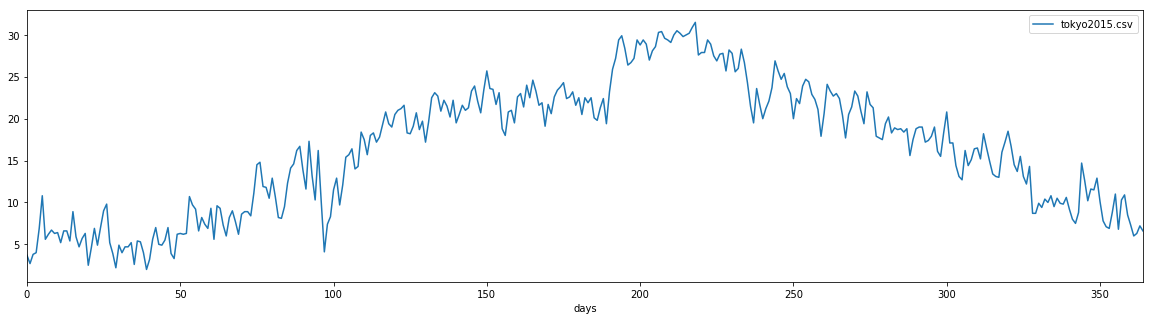

In [4]:
ax = None
for filename, df in dataframes:
    df = df.set_index('days')[['temperature_avg']]
    df.columns = [filename]
    if ax is None:
        ax = df.plot(figsize=(20, 5))
    else:
        df.plot(ax=ax)

## 湿度変化の確認

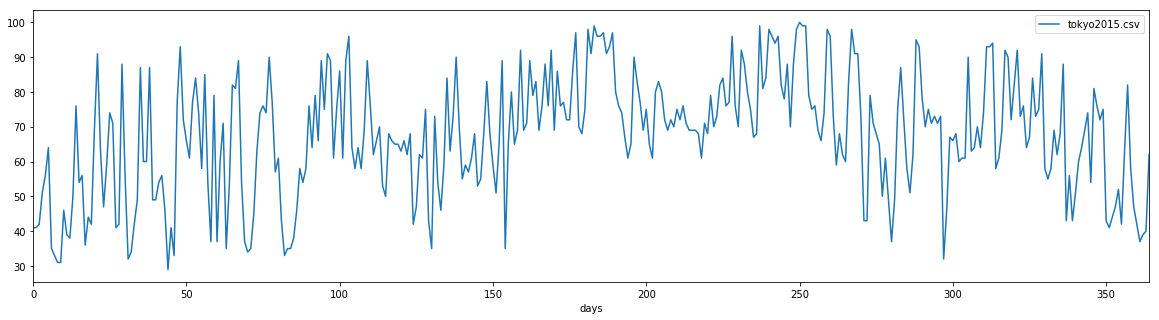

In [5]:
ax = None
for filename, df in dataframes:
    df = df.set_index('days')[['humidity_avg']]
    df.columns = [filename]
    if ax is None:
        ax = df.plot(figsize=(20, 5))
    else:
        df.plot(ax=ax)

## 風速変化の確認

週ごとの平均値をグラフ化する。

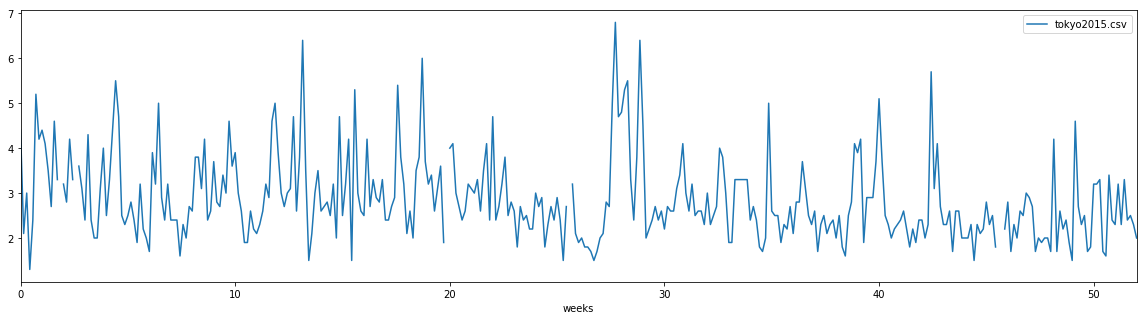

In [6]:
ax = None
for filename, df in dataframes:
    df = df.groupby('weeks').mean()[['wind_speed_avg']]
    df.columns = [filename]
    if ax is None:
        ax = df.plot(figsize=(20, 5))
    else:
        df.plot(ax=ax)

## 日照時間の確認

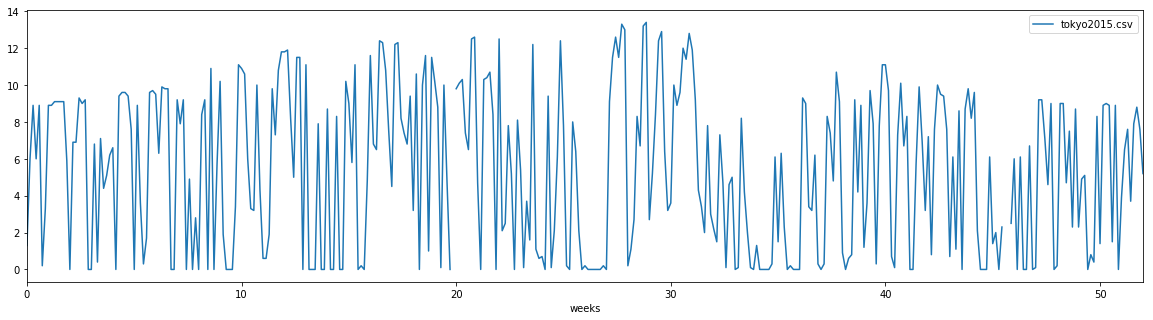

In [7]:
ax = None
for filename, df in dataframes:
    df = df.groupby('weeks').mean()[['sunshine_duration']]
    df.columns = [filename]
    if ax is None:
        ax = df.plot(figsize=(20, 5))
    else:
        df.plot(ax=ax)